In [12]:
import torch
import numpy as np
import pickle

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Product, ConstantKernel as C

import matplotlib.pyplot as plt
import gym_sin
from gym import spaces

from utilities.arguments import get_args
from learner.posterior_multi_task import PosteriorMTAgent
from inference.inference_network import InferenceNetwork
from ppo_a2c.envs import make_vec_envs_multi_task, get_vec_envs_multi_task
from task.GuassianTaskGenerator import GaussianTaskGenerator
from utilities.folder_management import handle_folder_creation


In [100]:
def get_const_task_sequence(alpha, n_restarts, num_test_processes, std):
    kernel = C(1.0, (1e-8, 1e8)) * RBF(1, (1e-8, 1e8))

    gp_list = []
    for i in range(num_test_processes):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 alpha=alpha ** 2,
                                                 normalize_y=False,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])
    init_prior_test = [torch.tensor([[-10], [5]], dtype=torch.float32) for _ in range(num_test_processes)]

    mean = -5

    prior_seq = []
    for idx in range(50):
        prior_seq.append(torch.tensor([[mean], [std]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test

In [101]:
num_test_processes = 1
gp_list, _, _ = get_const_task_sequence(3, 1, num_test_processes, 5)

In [102]:
x_train = np.arange(10)
y_train = np.arange(10)
gp_list[0][0].fit(np.atleast_2d(x_train).T, np.atleast_2d(y_train).T)

GaussianProcessRegressor(alpha=9, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=1, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [103]:
x_points = np.atleast_2d(np.arange(50)).T
pred, sigma = gp_list[0][0].predict(x_points, return_std=True)

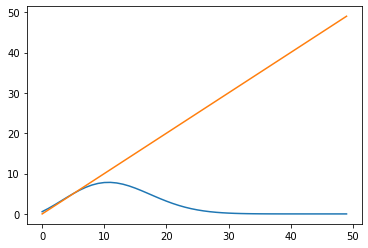

In [104]:
plt.plot(x_points, pred)
plt.plot(x_points, np.arange(50))

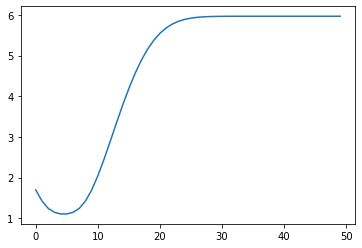

In [105]:
plt.plot(x_points, sigma)

In [84]:
sigma[0]

0.0010003569188179733

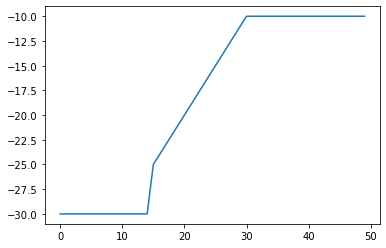

In [107]:
v = []
for idx in range(50):
    if idx < 15:
        v.append(-30)
    elif idx < 30:
        v.append(idx - 25 - 15)
    else:
        v.append(30 - 25 - 15)
plt.plot(v)

In [112]:
1e-3

0.001